In [1]:
# get flat data
import pandas as pd

hospitalA_df = pd.read_pickle("pickles/hospitalA_df_flat.pkl")

In [3]:
hospitalA_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [2]:
hospitalA_df.head()

HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  BaseExcess  HCO3  ...  \
0    NaN    NaN   NaN    NaN    NaN  NaN   NaN    NaN         NaN   NaN  ...   
1   97.0   95.0   NaN   98.0  75.33  NaN  19.0    NaN         NaN   NaN  ...   
2   89.0   99.0   NaN  122.0  86.00  NaN  22.0    NaN         NaN   NaN  ...   
3   90.0   95.0   NaN    NaN    NaN  NaN  30.0    NaN        24.0   NaN  ...   
4  103.0   88.5   NaN  122.0  91.33  NaN  24.5    NaN         NaN   NaN  ...   

   Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  83.14       0    NaN    NaN        -0.03       1   
1         NaN        NaN  83.14       0    NaN    NaN        -0.03       2   
2         NaN        NaN  83.14       0    NaN    NaN        -0.03       3   
3         NaN        NaN  83.14       0    NaN    NaN        -0.03       4   
4         NaN        NaN  83.14       0    NaN    NaN        -0.03       5   

   SepsisLabel  Patient_ID  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  

[5 rows x 42 columns]

In [3]:
# Check columns and data types
print(hospitalA_df.info())

# Summary statistics
print(hospitalA_df.describe())

# Check for missing values
print(hospitalA_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                729026 non-null  float64
 1   O2Sat             695136 non-null  float64
 2   Temp              266901 non-null  float64
 3   SBP               670014 non-null  float64
 4   MAP               709357 non-null  float64
 5   DBP               409918 non-null  float64
 6   Resp              712957 non-null  float64
 7   EtCO2             0 non-null       float64
 8   BaseExcess        82381 non-null   float64
 9   HCO3              63617 non-null   float64
 10  FiO2              112155 non-null  float64
 11  pH                90615 non-null   float64
 12  PaCO2             69288 non-null   float64
 13  SaO2              39160 non-null   float64
 14  AST               11820 non-null   float64
 15  BUN               64476 non-null   float64
 16  Alkalinephos      11

<Axes: >

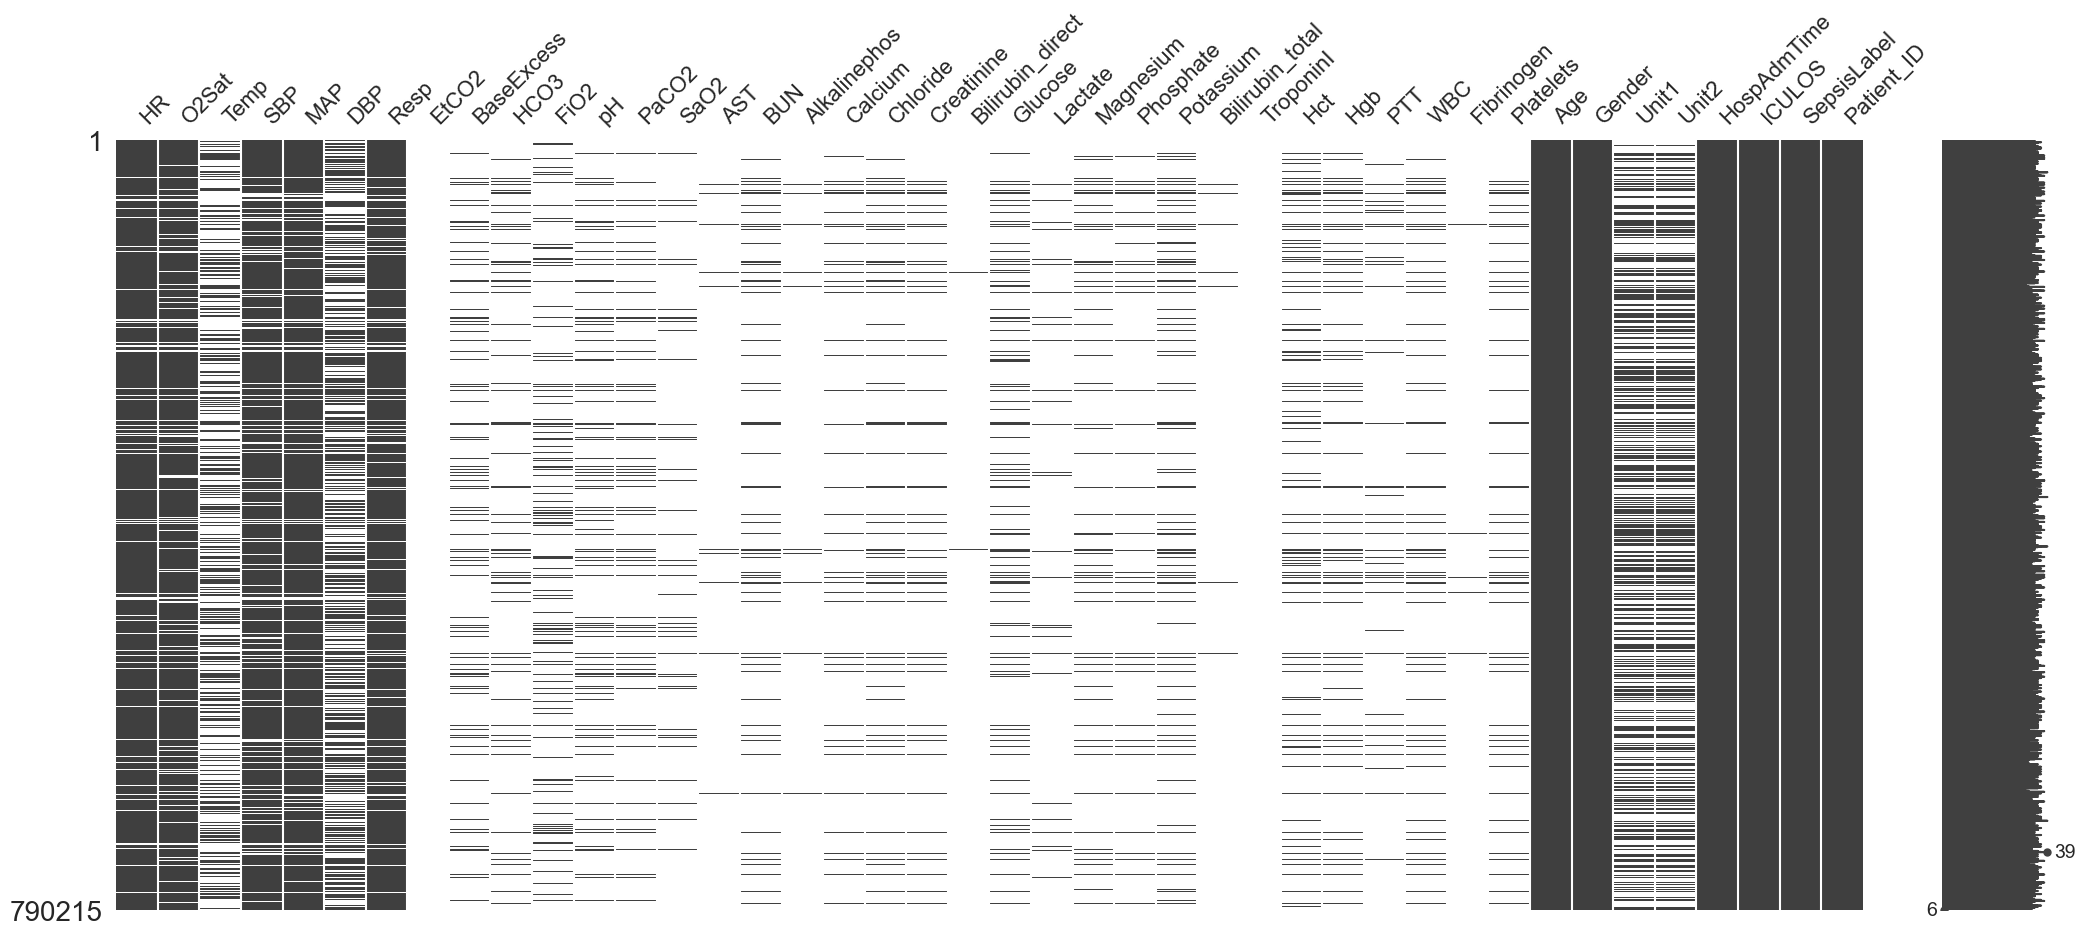

In [4]:
# missing data matrix
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

msno.matrix(hospitalA_df)

In [5]:
# Compute maximum ICULOS (last recorded time) for each patient
avg_icu_stay = hospitalA_df.groupby("Patient_ID")["ICULOS"].max().mean()

print(f"Average ICU stay duration: {avg_icu_stay:.2f} hours")


Average ICU stay duration: 39.77 hours


count    20336.000000
mean        39.774194
std         22.552482
min          8.000000
25%         26.000000
50%         40.000000
75%         48.000000
max        336.000000
Name: ICULOS, dtype: float64


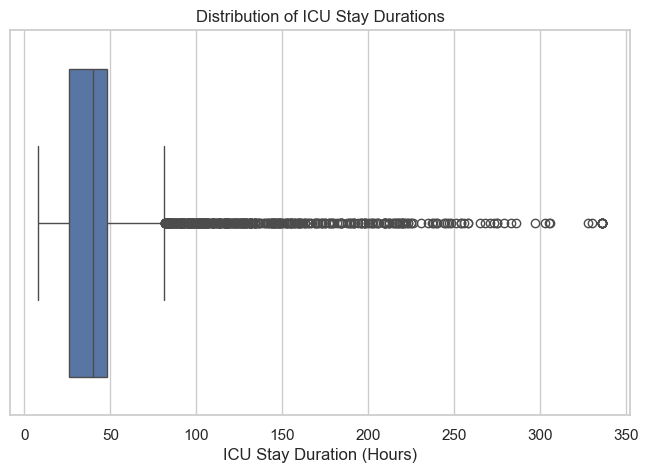

In [6]:
# Compute ICU stay duration per patient
icu_stay_durations = hospitalA_df.groupby("Patient_ID")["ICULOS"].max()

# Compute summary statistics
stats = icu_stay_durations.describe()
print(stats)

# Box plot visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x=icu_stay_durations)
plt.xlabel("ICU Stay Duration (Hours)")
plt.title("Distribution of ICU Stay Durations")
plt.show()


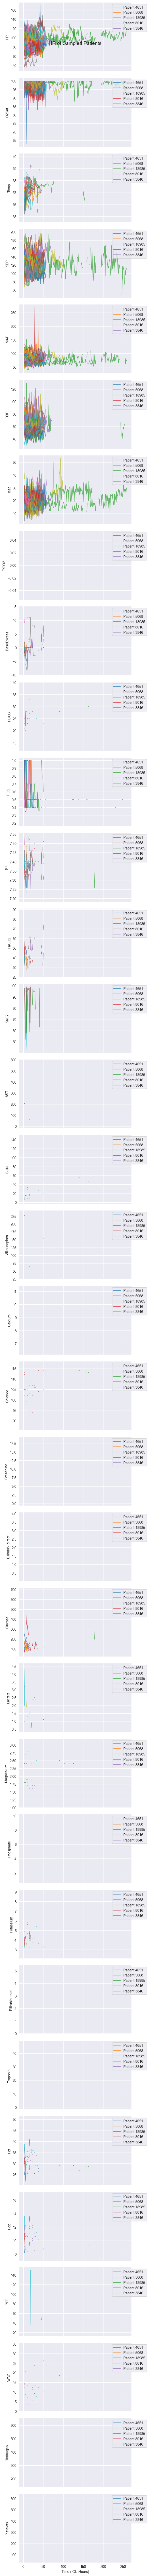

In [4]:
import matplotlib.pyplot as plt
import numpy as np

features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 
            'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 
            'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 
            'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen',
            'Platelets'] 

fig, axes = plt.subplots(len(features), 1, figsize=(6, len(features) * 3), sharex=True)
fig.suptitle("HR of Sampled Patients", fontsize=14)

# Ensure axes is iterable
if len(features) == 1:
    axes = [axes]

# Sample 100 patient IDs
sampled_ids = np.random.choice(hospitalA_df["Patient_ID"].unique(), size=100, replace=False)

# Plot each patient
legend_handles = [[] for _ in features]  # Collect legend handles for each feature

for patient_id in sampled_ids:
    patient_df = hospitalA_df[hospitalA_df["Patient_ID"] == patient_id]

    for i, feature in enumerate(features):
        if feature in patient_df.columns:
            line, = axes[i].plot(patient_df["ICULOS"], patient_df[feature], alpha=0.7, label=f"Patient {patient_id}")
            legend_handles[i].append(line)

# Label axes and add legend
max_num_legend_items = 5  # Adjust to your preference

for i, feature in enumerate(features):
    axes[i].set_ylabel(feature)

    handles = legend_handles[i][:max_num_legend_items]
    labels = [handle.get_label() for handle in handles]
    axes[i].legend(handles, labels, loc="upper right", bbox_to_anchor=(1.15, 1))

plt.xlabel("Time (ICU Hours)")
plt.tight_layout()
plt.show()


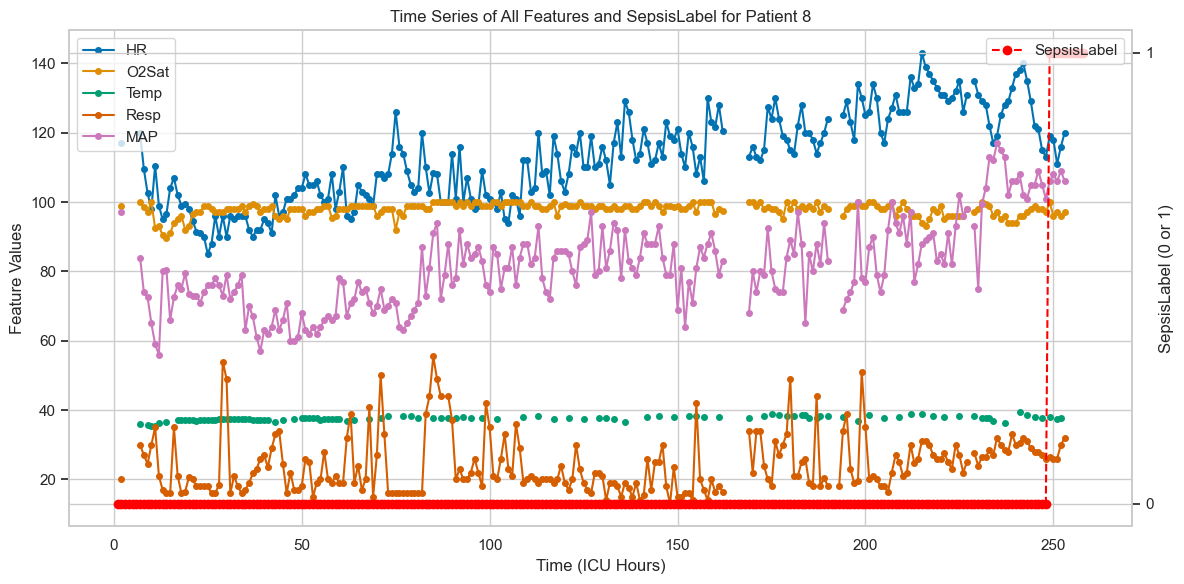

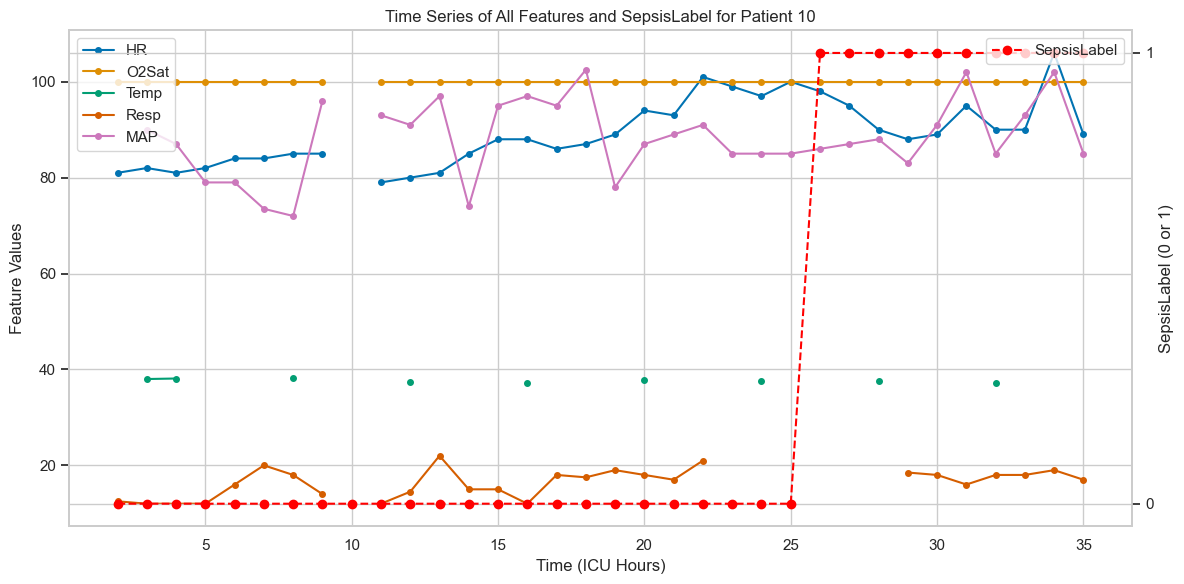

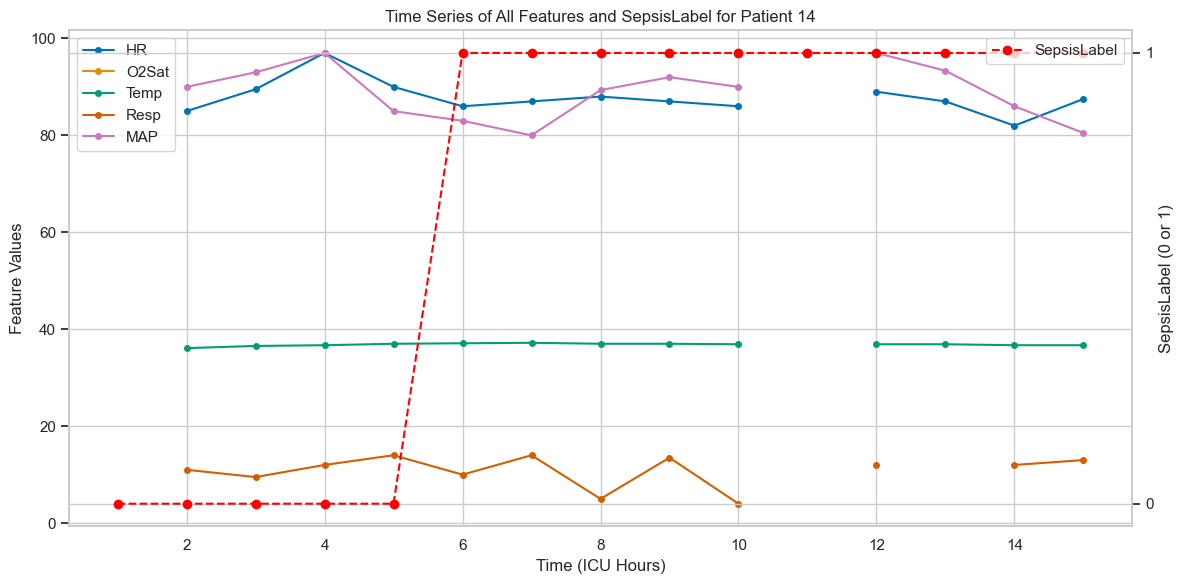

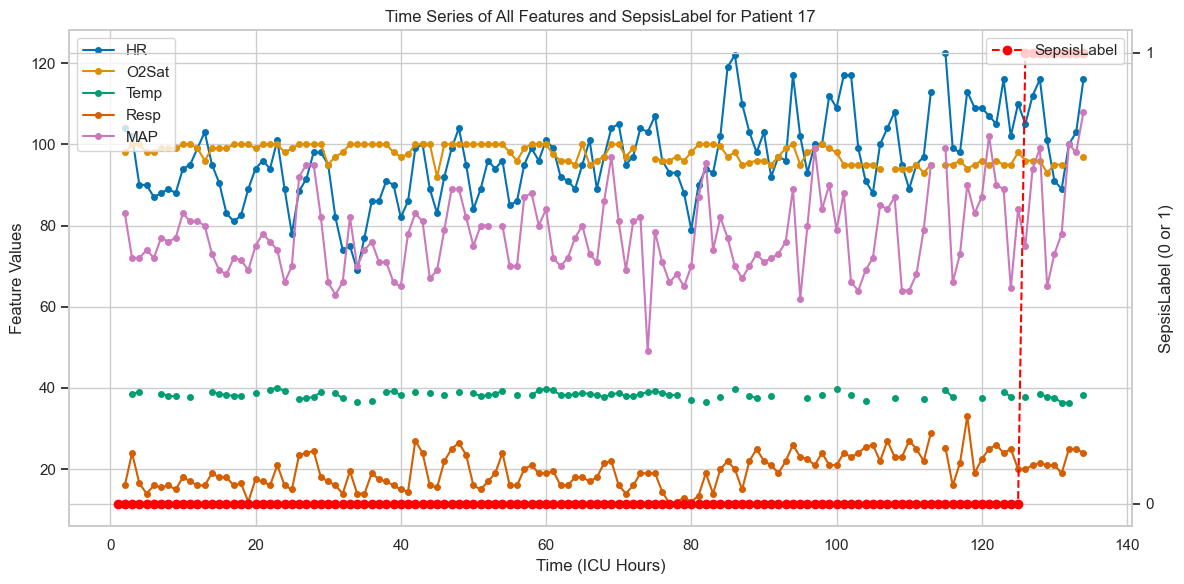

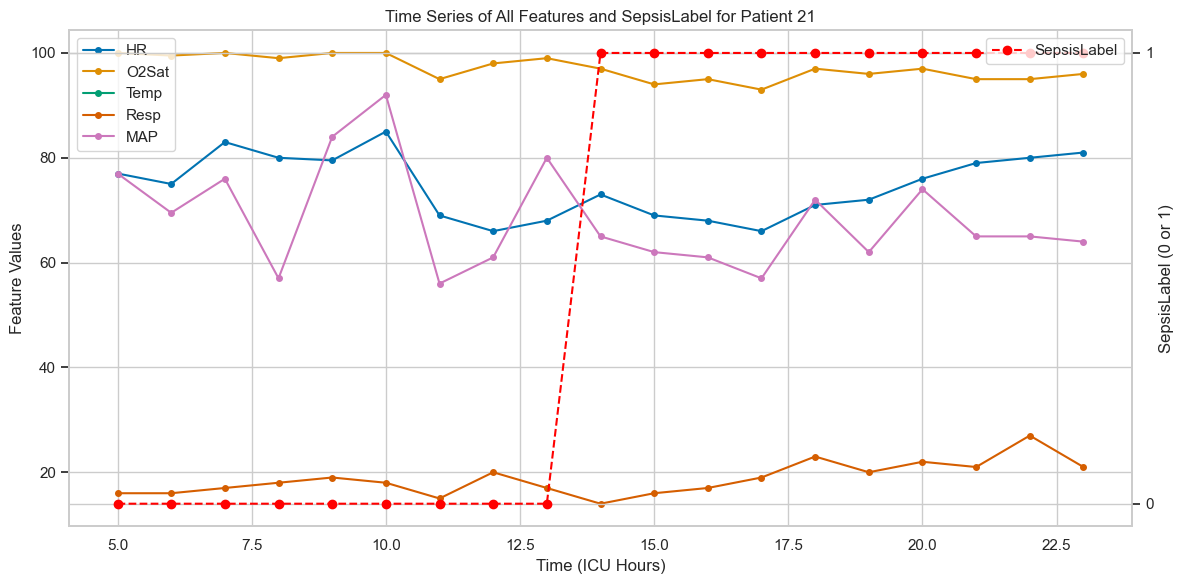

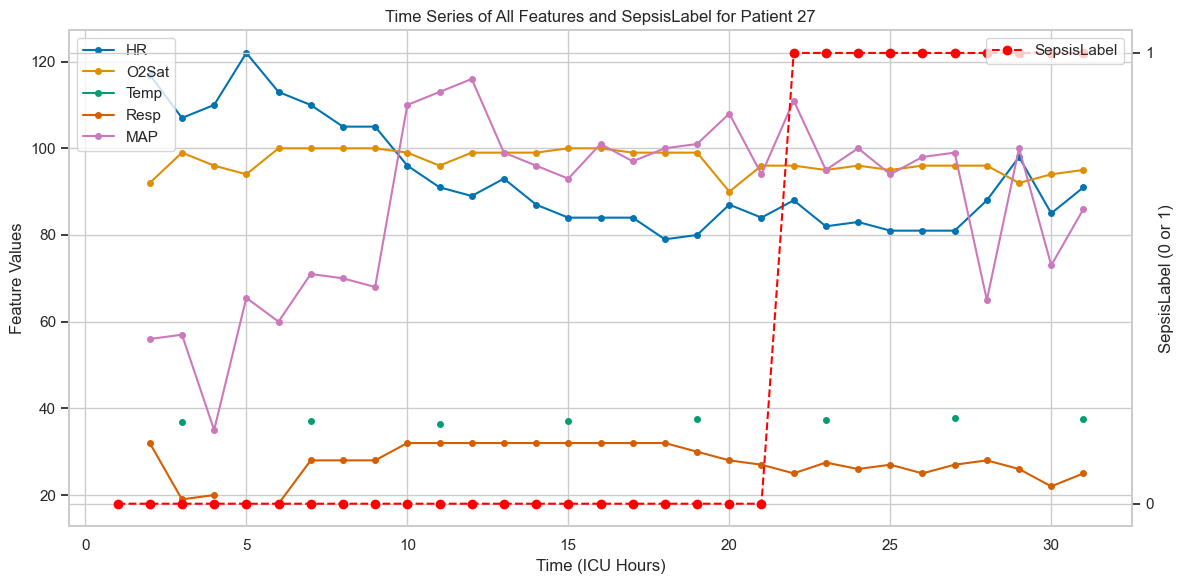

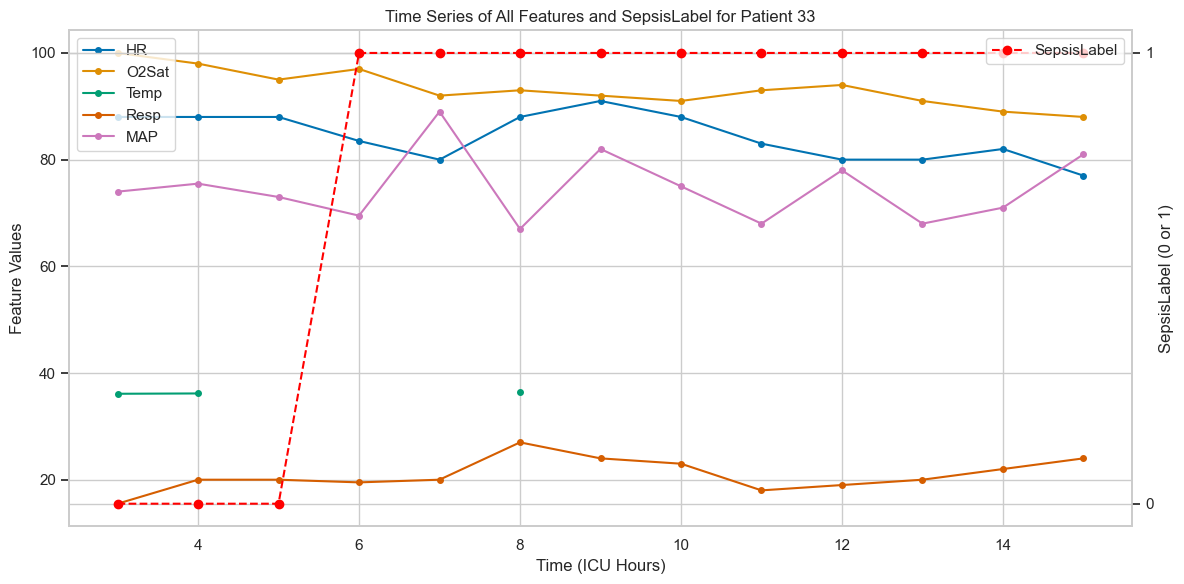

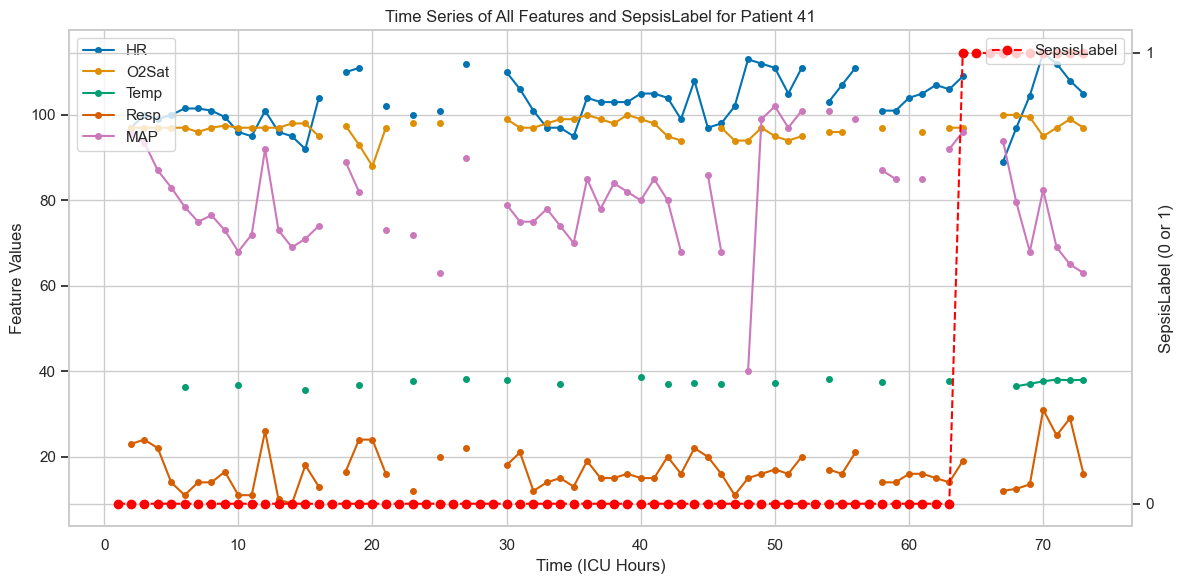

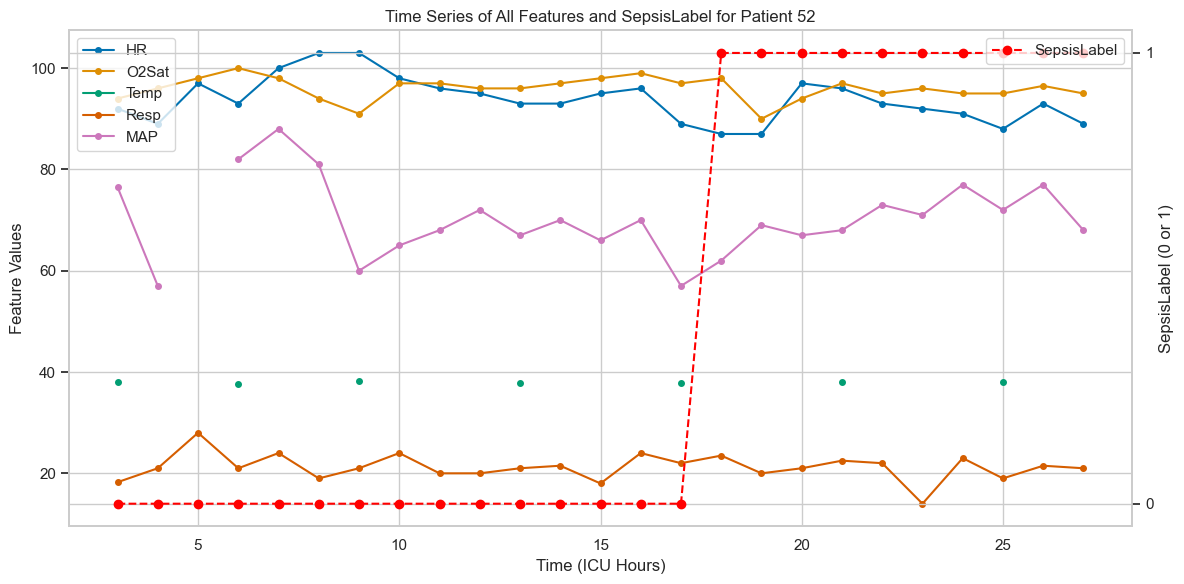

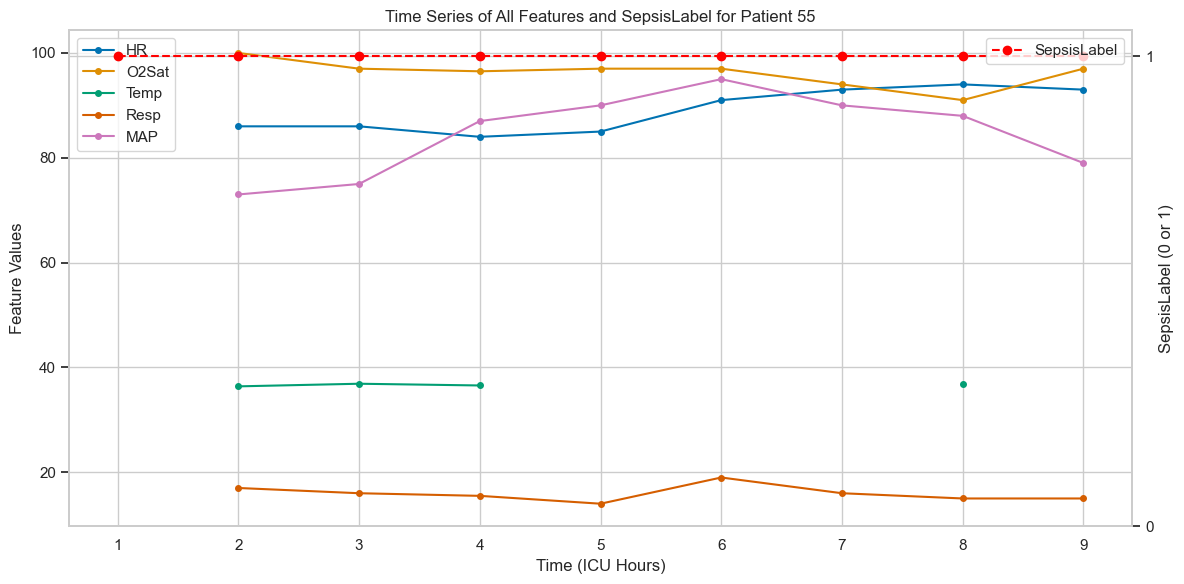

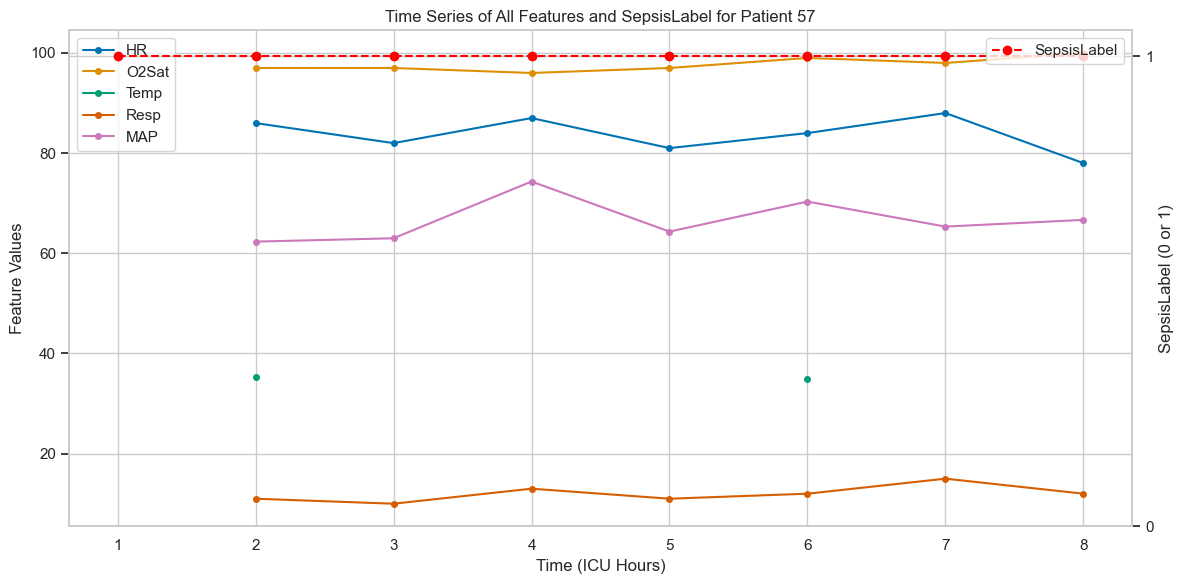

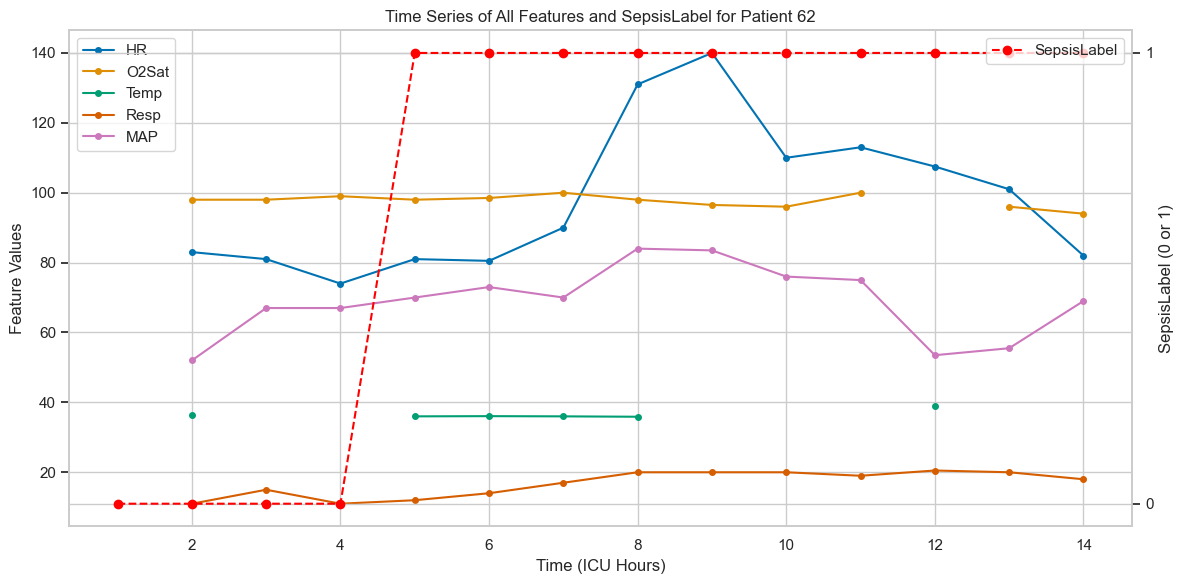

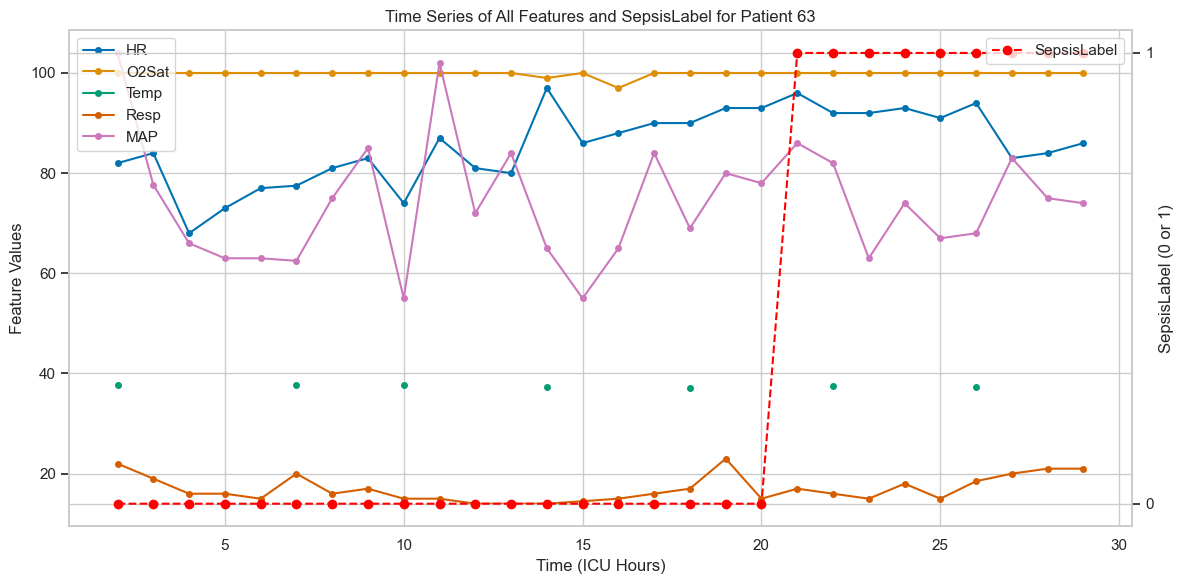

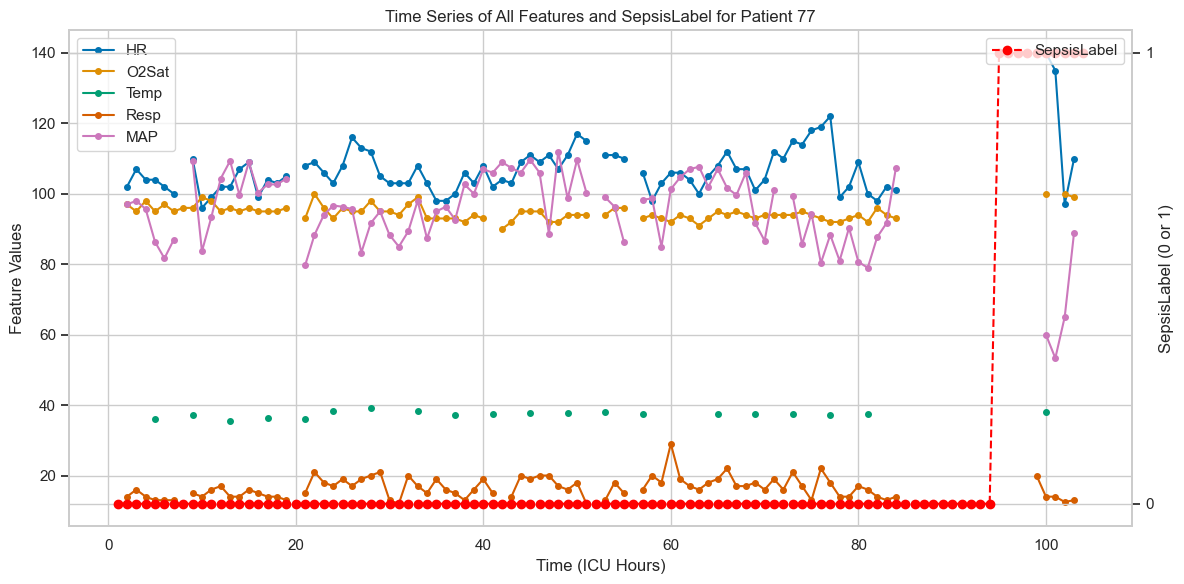

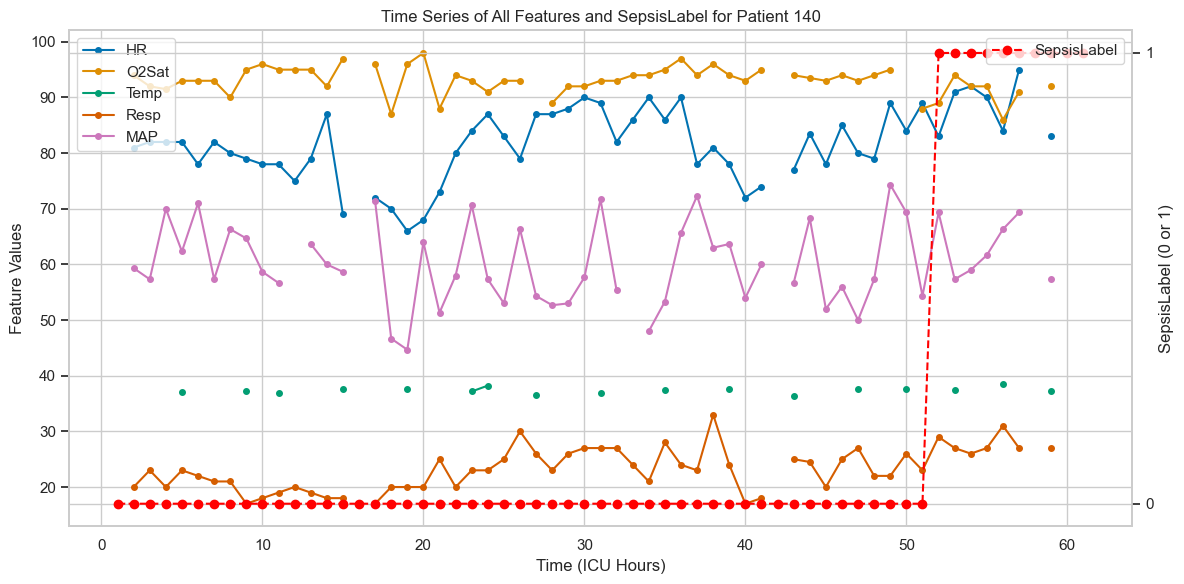

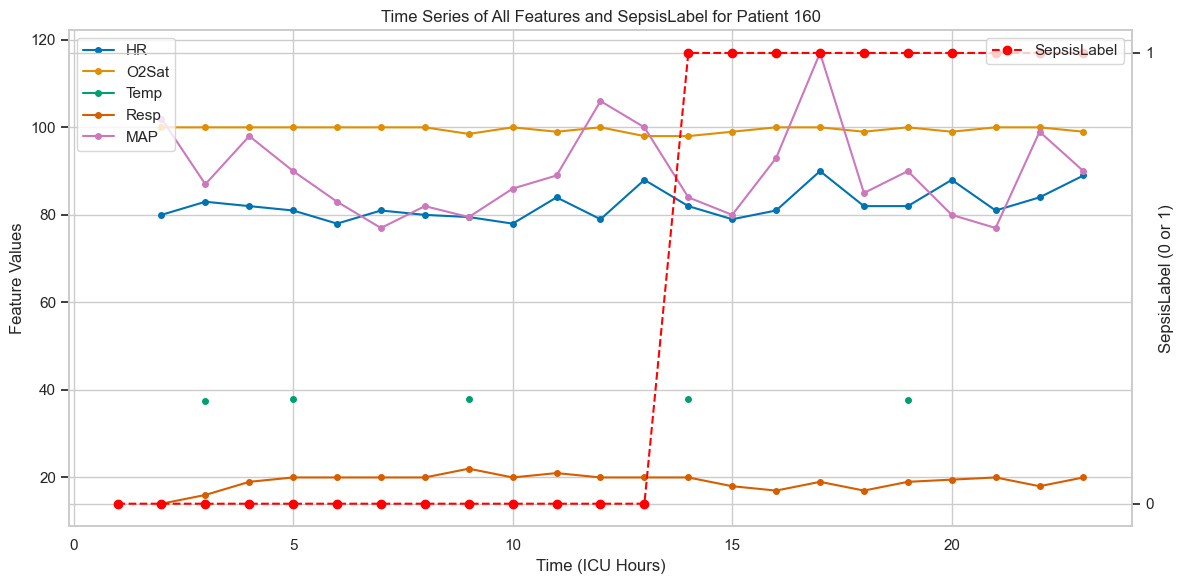

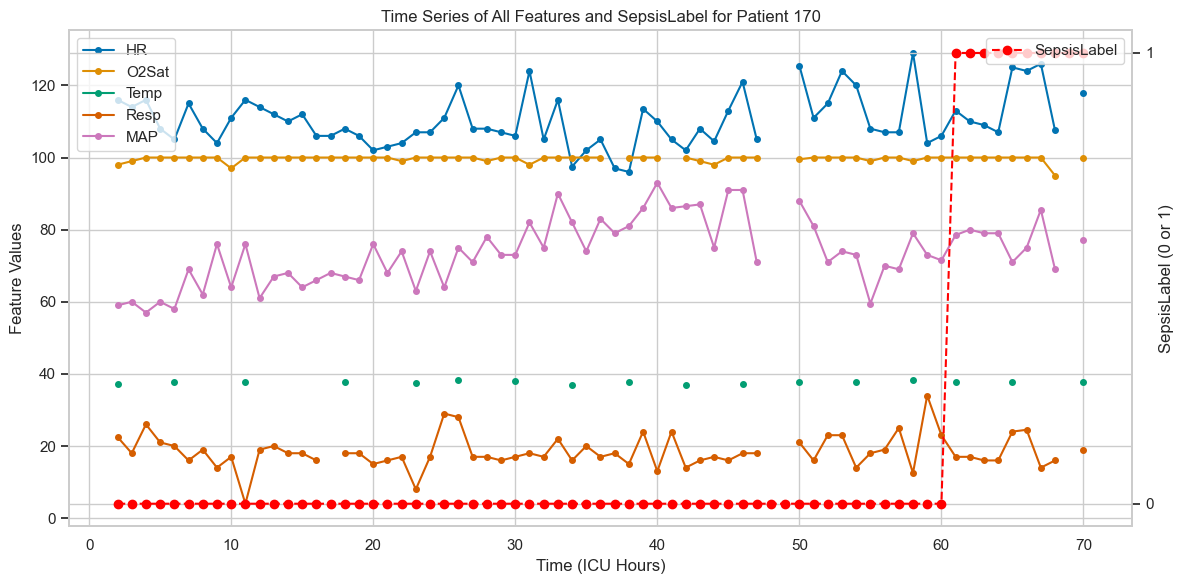

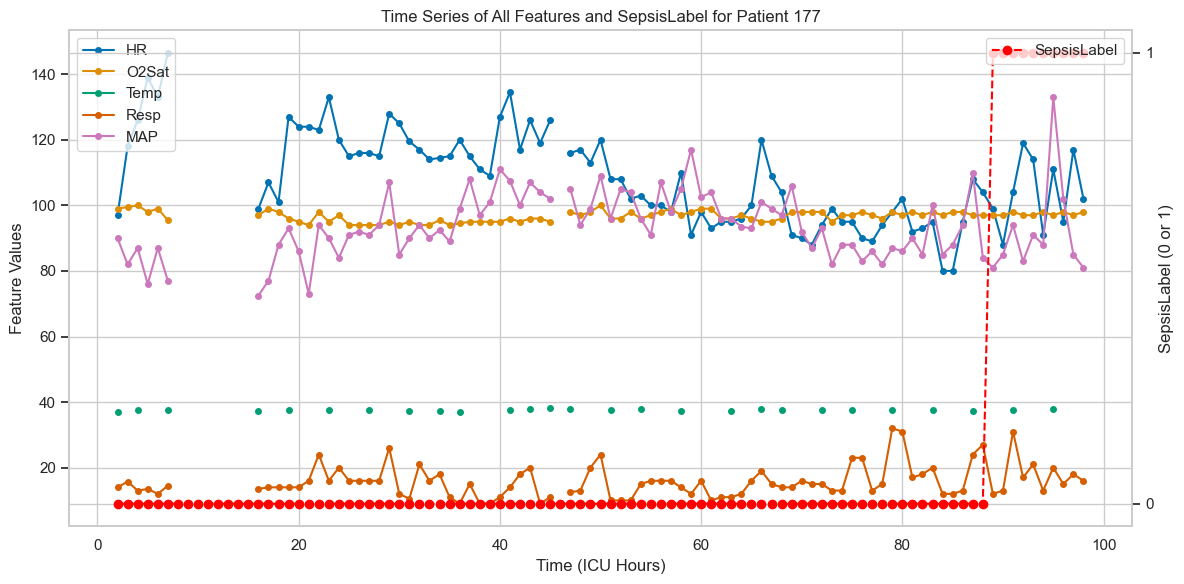

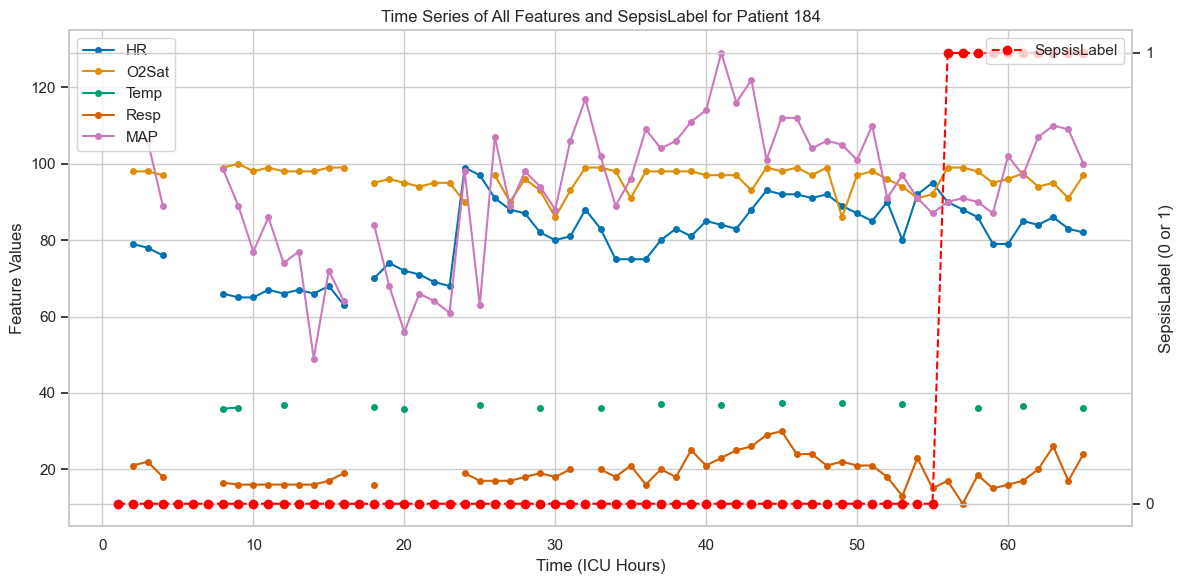

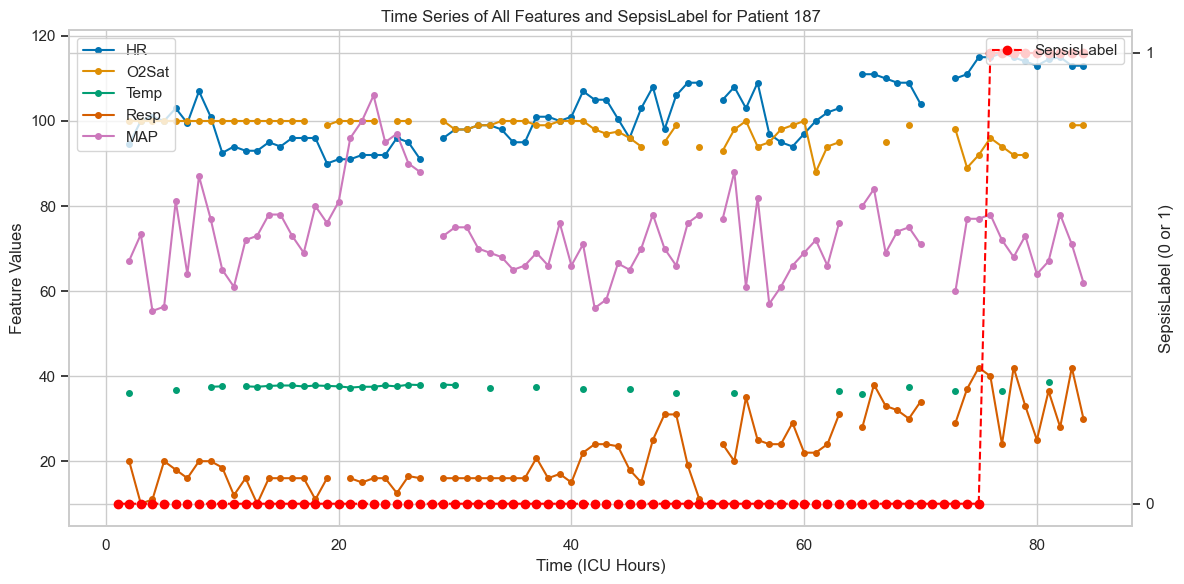

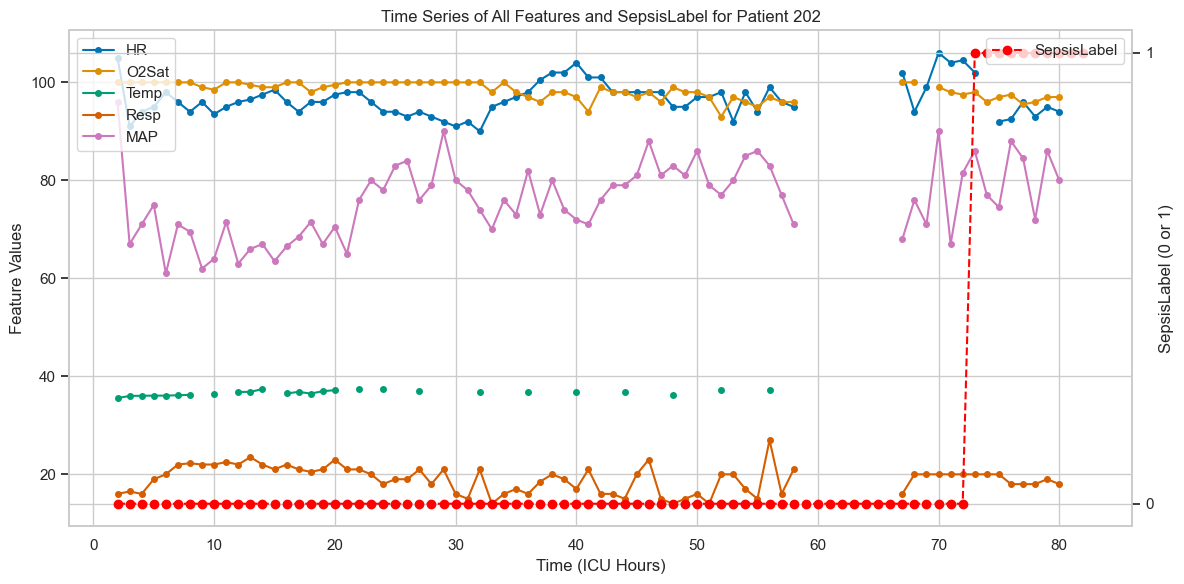

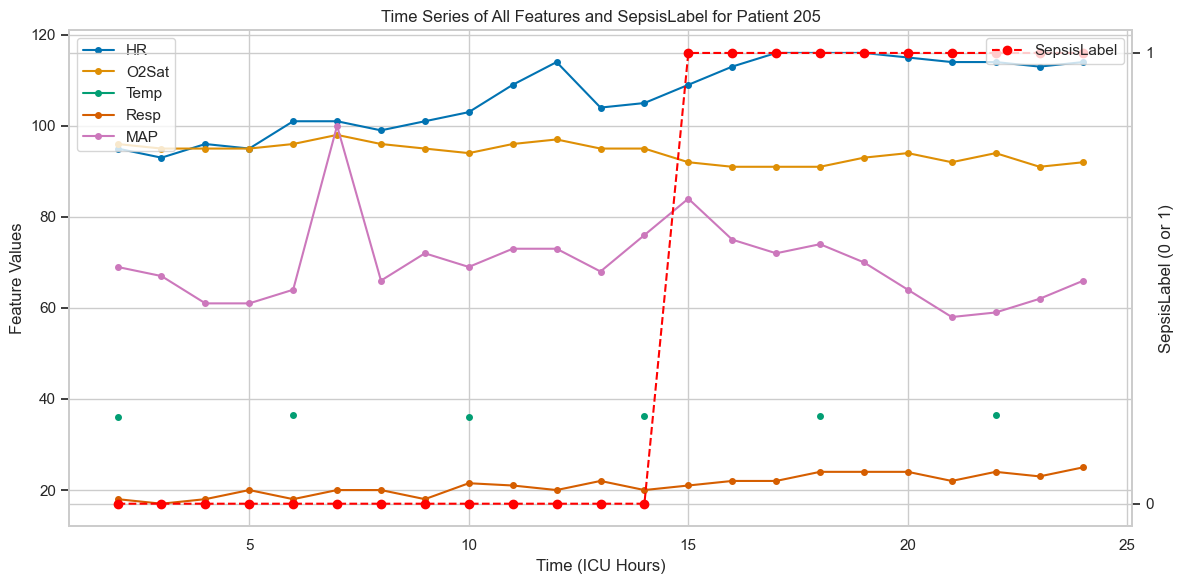

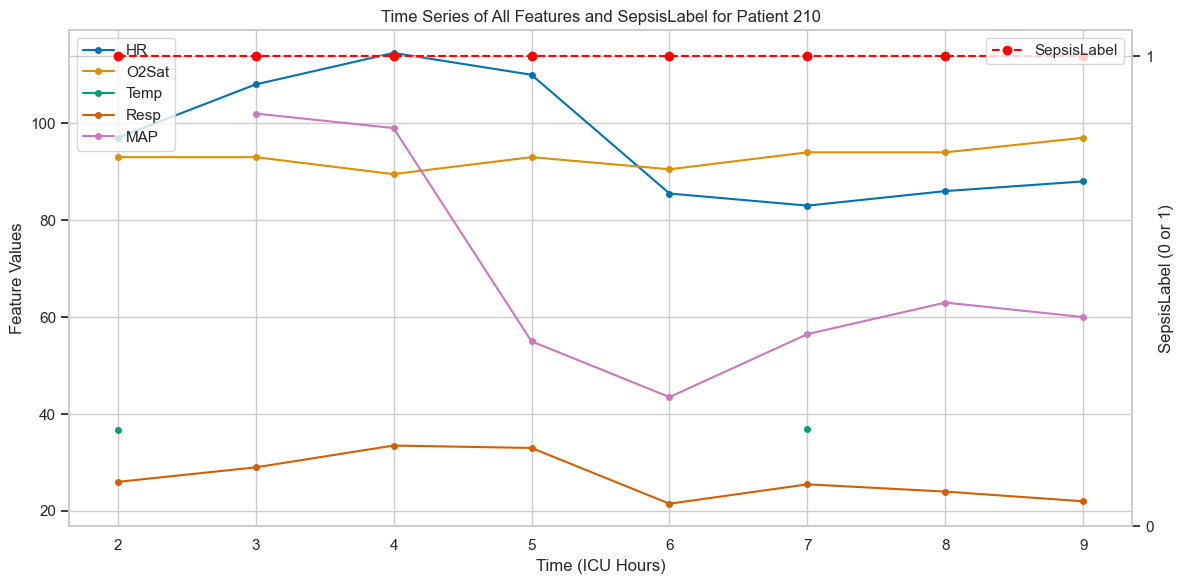

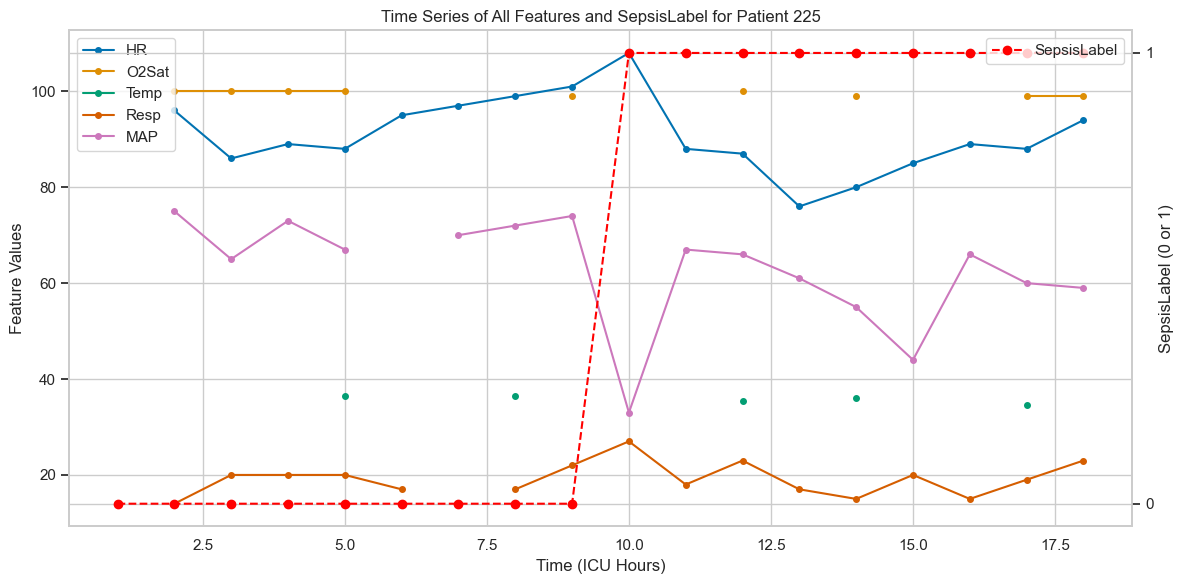

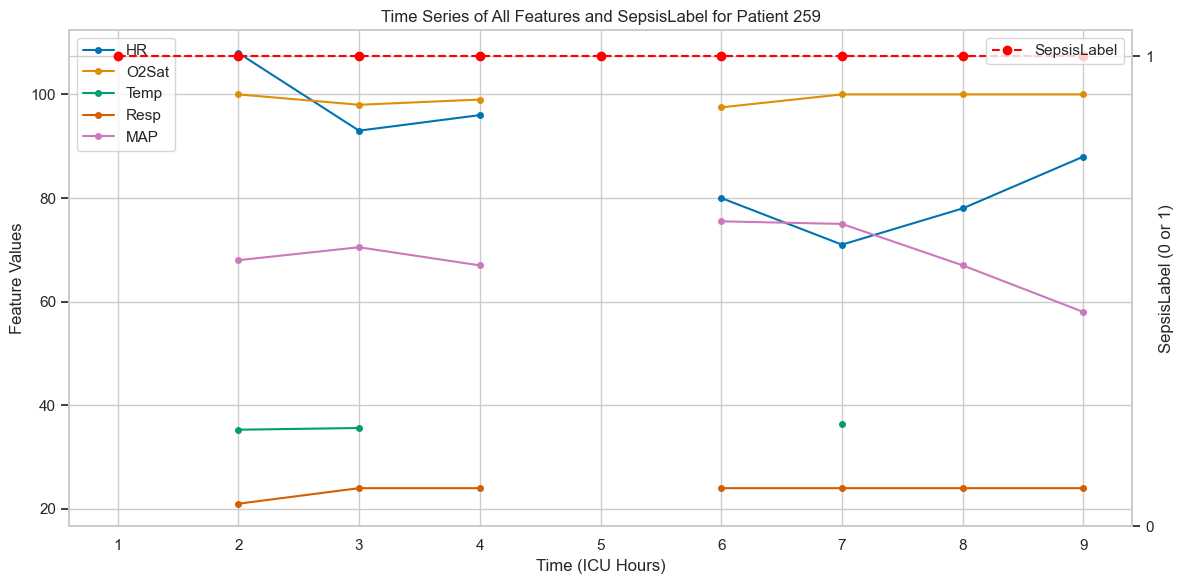

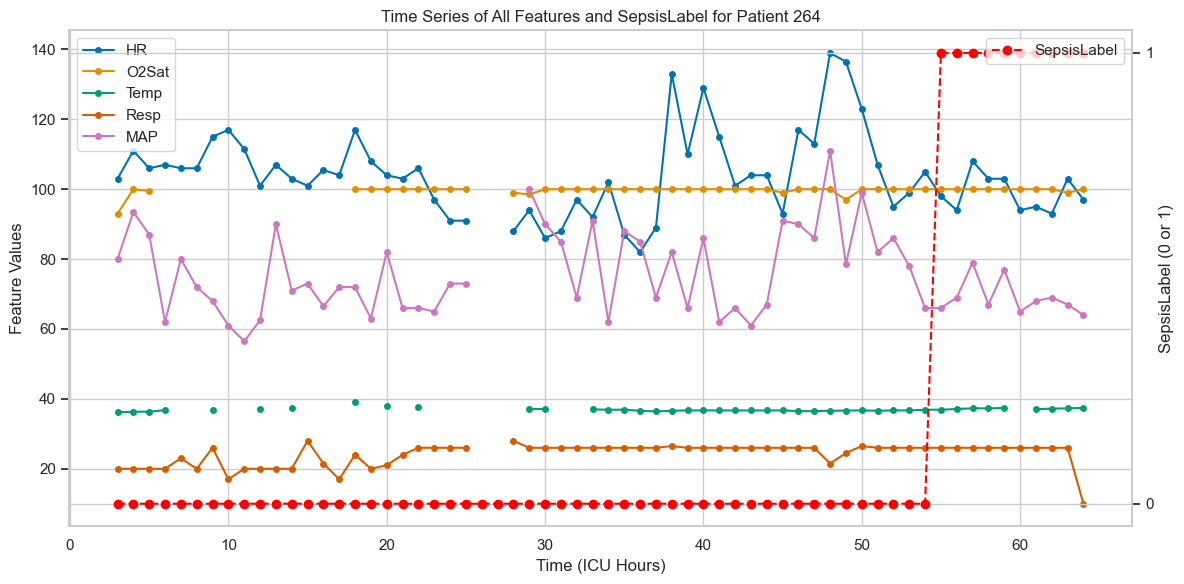

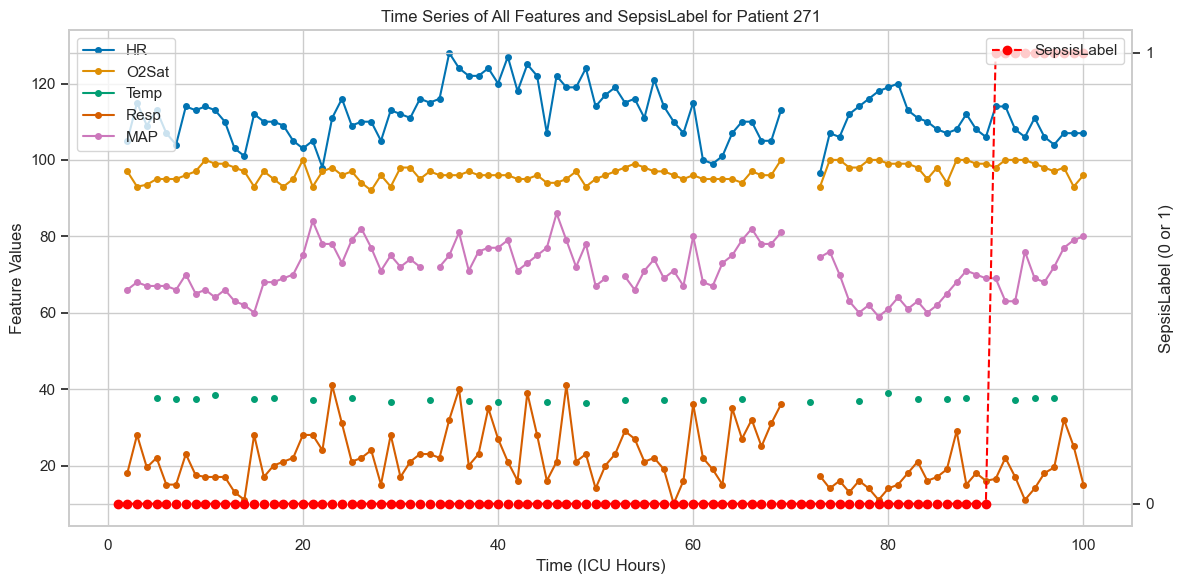

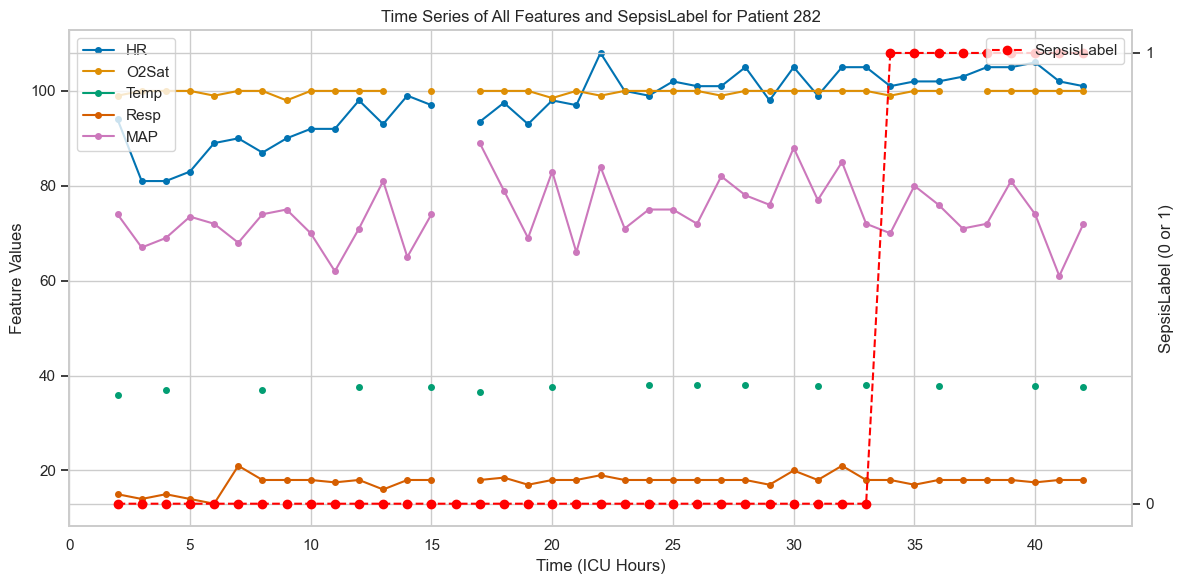

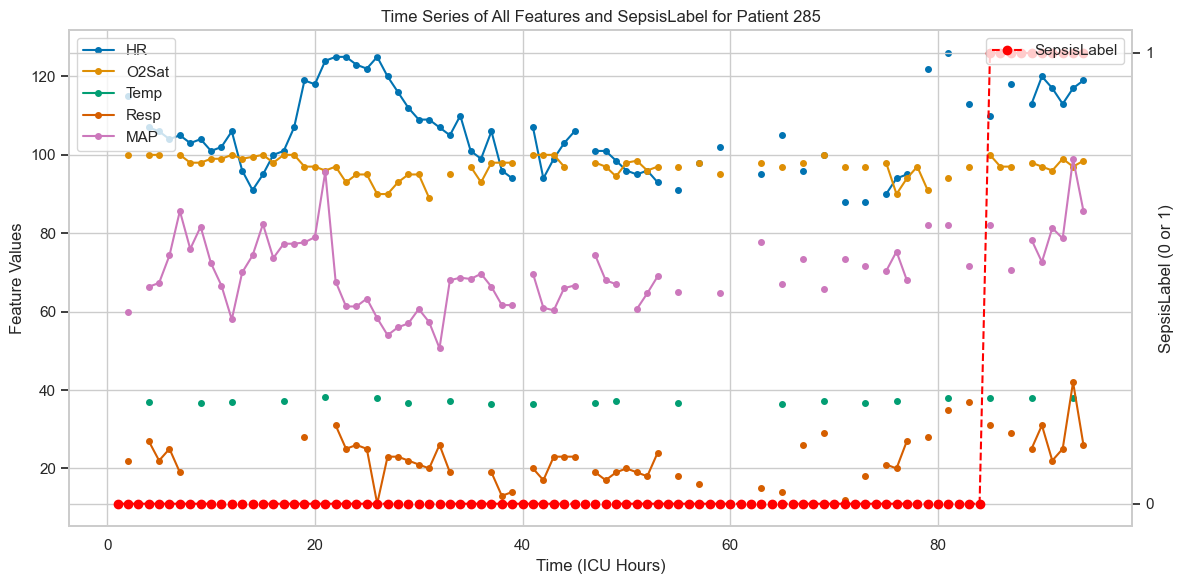

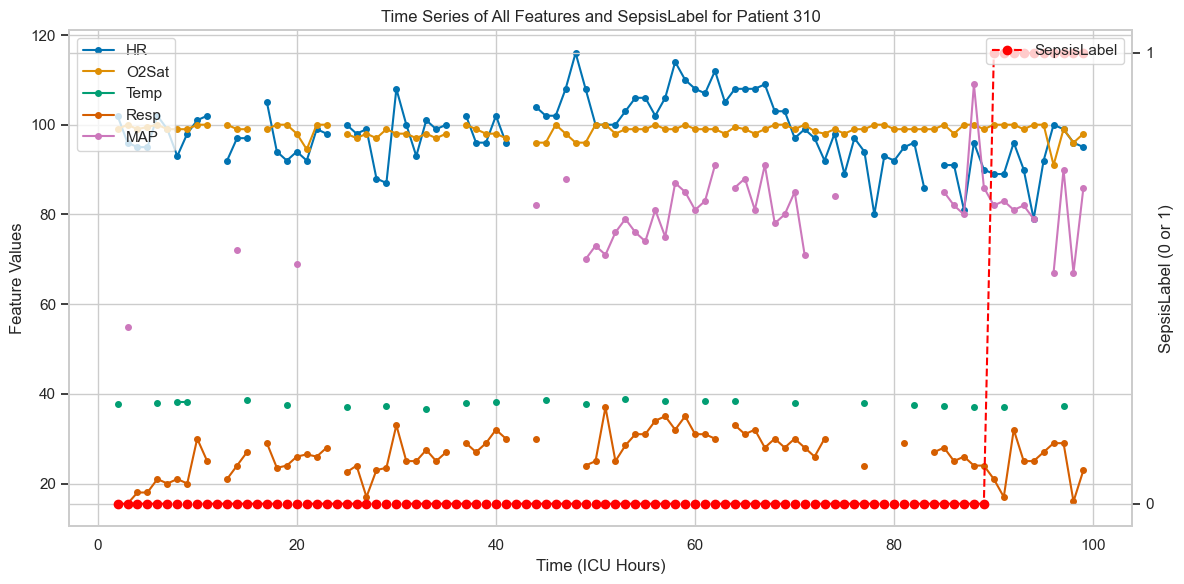

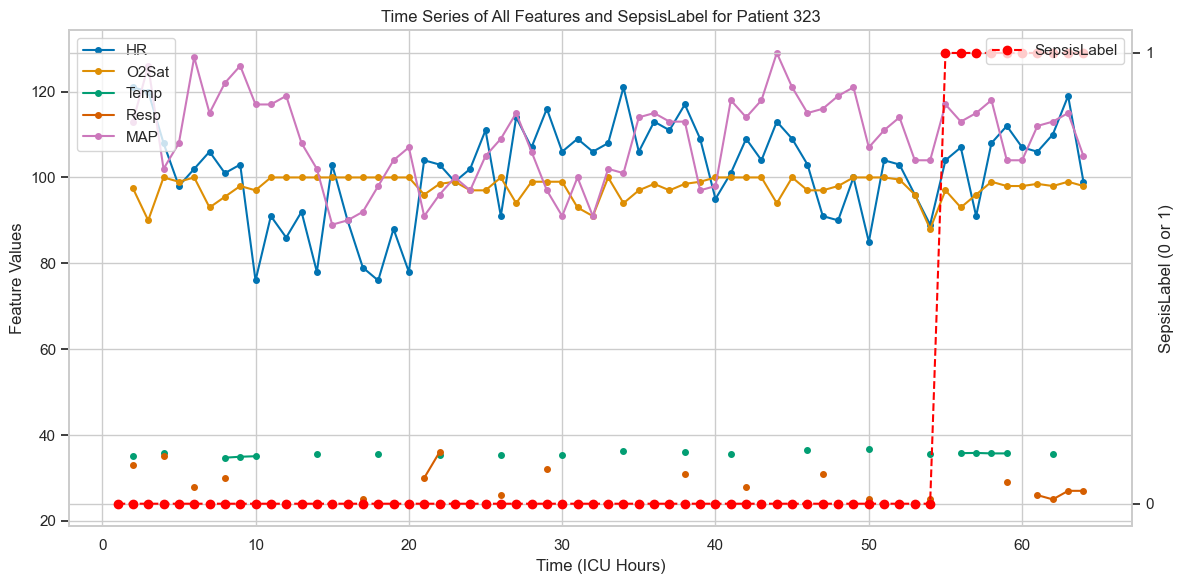

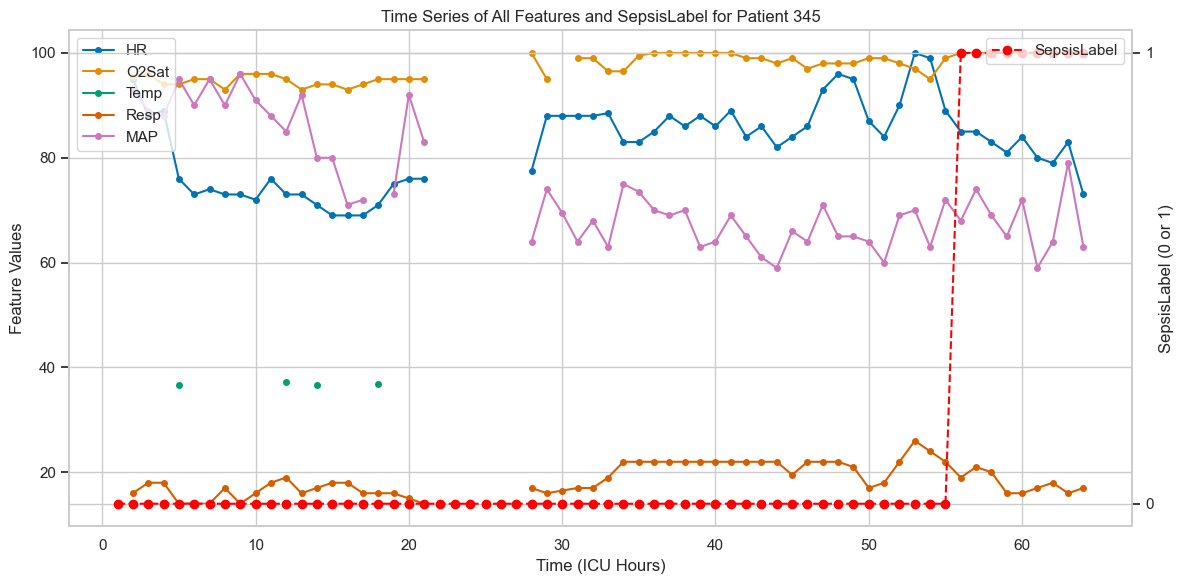

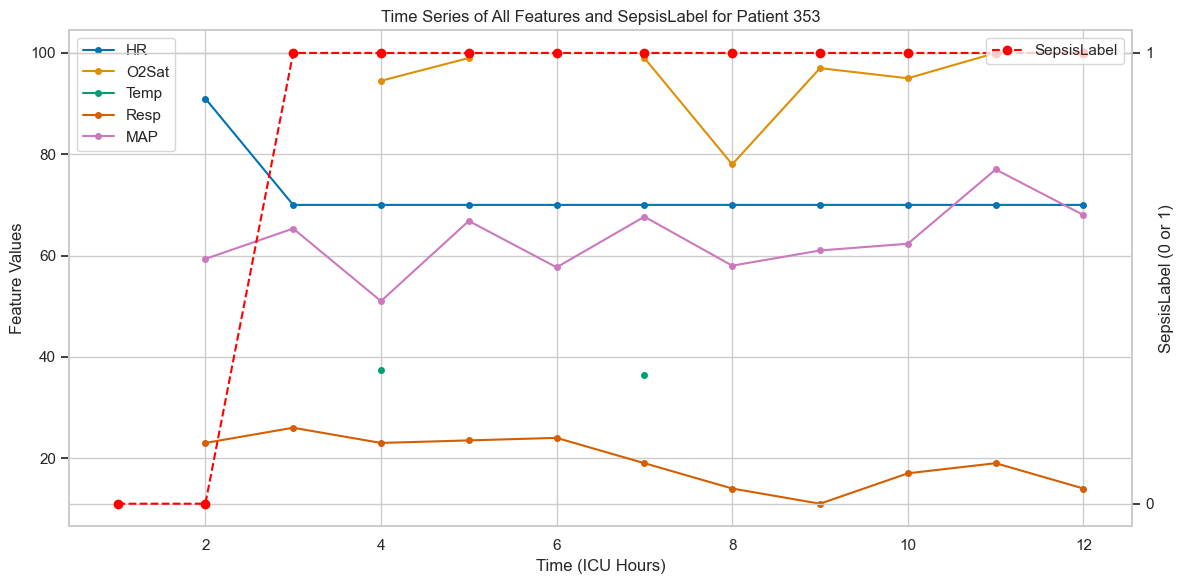

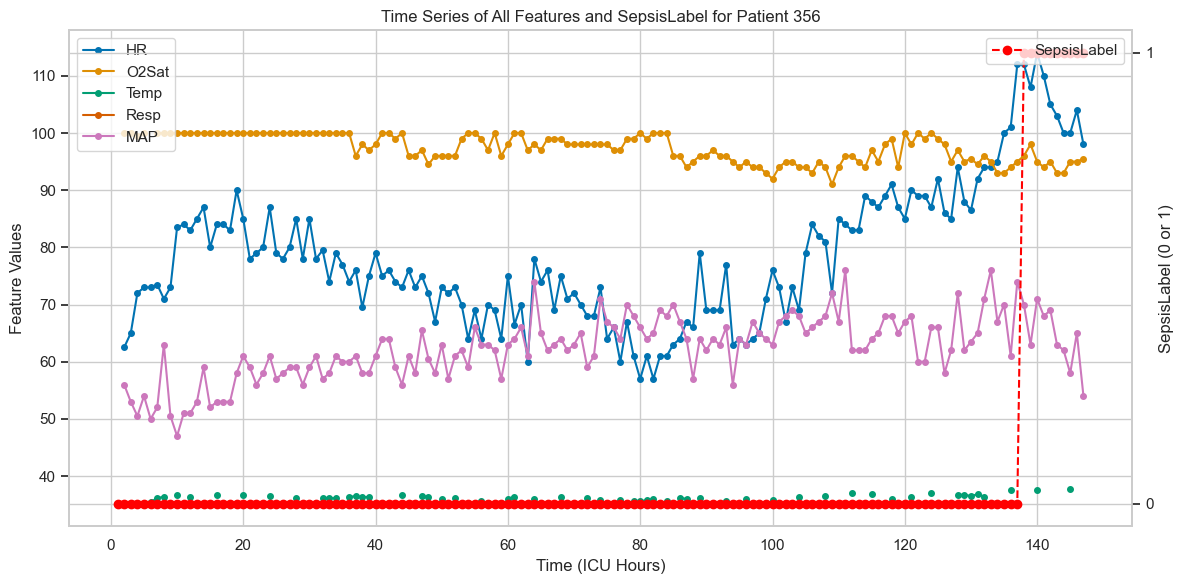

KeyboardInterrupt: 

In [8]:
from sktime.utils import plot_series
features = ["HR", "O2Sat", "Temp", "Resp", "MAP"]  # Exclude SepsisLabel from the main features

septic_patients = hospitalA_df[hospitalA_df["SepsisLabel"] == 1]["Patient_ID"].unique()

for patient_id in septic_patients:
    patient_df = hospitalA_df[hospitalA_df["Patient_ID"] == patient_id]
    patient_df = patient_df.sort_values(by='ICULOS')

    series_list = [patient_df.set_index("ICULOS")[feature] for feature in features if feature in patient_df.columns]
    sepsis_series = patient_df.set_index("ICULOS")["SepsisLabel"]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    plot_series(*series_list, labels=features, ax=ax1)
    ax1.set_xlabel("Time (ICU Hours)")
    ax1.set_ylabel("Feature Values")

    ax2 = ax1.twinx()
    ax2.plot(sepsis_series.index, sepsis_series, label="SepsisLabel", color="red", linestyle="--", marker="o")
    ax2.set_ylabel("SepsisLabel (0 or 1)")
    ax2.set_yticks([0, 1])

    # Add legends
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.title(f"Time Series of All Features and SepsisLabel for Patient {patient_id}")
    plt.tight_layout()
    plt.show()
